### To run the cbgt network, see first the technical_testbench to install all the required packages and start the server 

In [1]:
#Auto reloading 
#%load_ext autoreload
#%autoreload 2
#%reload_ext autoreload 

In [2]:
#Removing indentation issues:
#!autopep8 --in-place --aggressive --aggressive init_params.py
#!autopep8 --in-place --aggressive --aggressive popconstruct.py
#!autopep8 --in-place --aggressive --aggressive generateepochs.py
#!autopep8 --in-place --aggressive --aggressive qvalues.py

In [3]:
!python setup.py build_ext --inplace

running build_ext
copying build/lib.linux-x86_64-3.6/agent_timestep.cpython-36m-x86_64-linux-gnu.so -> 


In [4]:
#Importing scripts:
import cbgt as cbgt
from frontendhelpers import * 
from tracetype import *
import init_params as par 
import popconstruct as popconstruct
import qvalues as qval
import generateepochs as gen
from agentmatrixinit import *
#from general_init_codeblocks import *
from agent_timestep import timestep_mutator, multitimestep_mutator
import pdb
import pipeline_creation as pl_creat
import mega_loop as ml

import matplotlib.pyplot as plt

/home/bahuguna/anaconda3/envs/cbgt_env/lib/python3.6/site-packages/ray/autoscaler/_private/cli_logger.py:61: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
  "update your install command.", FutureWarning)
2021-09-29 16:03:58,798	INFO worker.py:727 -- Connecting to existing Ray cluster at address: 172.25.7.13:6379


# Create pipeline

### Network pipeline

In [5]:
seed = np.random.randint(0,9999999)
print(seed)
np.random.seed(seed)
to_check = np.random.randint(0,50,10)
print(to_check)

7343146
[36  3 21 49 11 30 37 16 18 17]


In [6]:
#Create the whole pipeline.
#This pipeline creates three sub-pipelines: 
#rewards pipeline (rsg), q values pipeline (q_val), network pipeline(pl)

pl = pl_creat.create_main_pipeline()
mega_l = ml.mega_loop

# Timestep loop

In [7]:
#Adding the timestep loop to the main pipeline
pl.add(mega_l)

# Running the pipeline

### 1. Default values

In [8]:
#See init_params.py / generateepochs.py / popconstruct.py / qvalues.py
#to know the parameters contained in each of the following variables 
environment = {
    'params': None, #neuron parameters (init_params.py)
    'pops': None,   #population parameters (init_params.py)
    'receps' : None, #receptor parameters (init_params.py)
    'base' : None, #baseline stimulation parameters (init_params.py)
    'dpmns' : None, #dopamine related parameters (init_params.py)
    'd1' : None, #D1-MSNs population related parameters (init_params.py)
    'd2' : None, #D2-MSNs population related parameters (init_params.py)
    'channels' : pd.DataFrame([["left"],["right"]], columns=['action']), #action channels related parameters (init_params.py)
    #'actionchannels' : pd.DataFrame([[1],[2]], columns=['action']), #labels for the actions (init_params.py)
    #'actionchannels' : pd.DataFrame([["left"],["right"]], columns=['action']), #labels for the actions (init_params.py)
    'newpathways' : None, #connectivity parameters (popconstruct.py)
    'Q_support_params': None, #initialization of Q-values update (qvalues.py) 
    'Q_df':None, #initialized Q-values df (qvalues.py)  
    'n_trials': 5, #number of trials (generateepochs.py)
    'volatility': 2, #frequency of changepoints (generateepochs.py)
    'conflict': 0.7, #probability of the preferred choice (generateepochs.py)
    'reward_mu': 1, #mean for the magnitude of the reward (generateepochs.py)
    'reward_std': 0.1, #std for the magnitude of the reward (generateepochs.py)
}
results = cbgt.ExecutionManager(cores=7).run(pl,environment)

(raylet) /home/bahuguna/anaconda3/envs/cbgt_env/lib/python3.6/site-packages/ray/autoscaler/_private/cli_logger.py:61: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
(raylet)   "update your install command.", FutureWarning)
(raylet) /home/bahuguna/anaconda3/envs/cbgt_env/lib/python3.6/site-packages/ray/autoscaler/_private/cli_logger.py:61: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
(raylet)   "update your install command.", FutureWarning)
(raylet) /home/bahuguna/anaconda3/envs/cbgt_env/lib/python3.6/site-packages/ray/autoscaler/_private/cli_logger.py:61: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `p

(pid=1232273) 2 4 0.161668`
(pid=1232273) 2 4 0.161668`
(pid=1232273) 3 5 0.161668`
(pid=1232273) 3 5 0.161668`
(pid=1232273) 10 6 1.0`
(pid=1232273) 10 8 1.0`
(pid=1232273) 10 6 1.0`
(pid=1232273) 10 8 1.0`
(pid=1232273) 10 10 0.4335`
(pid=1232273) 10 10 0.4335`
(pid=1232273) 10 11 0.4335`
(pid=1232273) 10 12 1.0`
(pid=1232273) 10 13 1.0`
(pid=1232273) 10 14 1.0`
(pid=1232273) 10 11 0.4335`
(pid=1232273) 10 12 1.0`
(pid=1232273) 10 13 1.0`
(pid=1232273) 10 14 1.0`
(pid=1232273) 10 15 0.241667`
(pid=1232273) 11 7 1.0`
(pid=1232273) 11 9 1.0`
(pid=1232273) 10 15 0.241667`
(pid=1232273) 11 7 1.0`
(pid=1232273) 11 9 1.0`
(pid=1232273) 11 10 0.4335`
(pid=1232273) 11 10 0.4335`
(pid=1232273) 11 11 0.4335`
(pid=1232273) 11 12 1.0`
(pid=1232273) 11 13 1.0`
(pid=1232273) 11 14 1.0`
(pid=1232273) 11 11 0.4335`
(pid=1232273) 11 12 1.0`
(pid=1232273) 11 13 1.0`
(pid=1232273) 11 14 1.0`
(pid=1232273) 11 15 0.241667`
(pid=1232273) 12 6 1.0`
(pid=1232273) 12 8 1.0`
(pid=1232273) 12 14 0.8334`
(pid=1

(pid=1232273) phasetimer 101
(pid=1232273) globaltimer 3508
(pid=1232273)   action
(pid=1232273) 0   left
(pid=1232273) 1  right
(pid=1232273) chosen_action None
(pid=1232273) phasetimer 101
(pid=1232273) globaltimer 3508
(pid=1232273)   action
(pid=1232273) 0   left
(pid=1232273) 1  right
(pid=1232273) chosen_action None
(pid=1232273) phasetimer 1001
(pid=1232273) globaltimer 4610
(pid=1232273) gateFRs [0. 0.]
(pid=1232273) thresholds_crossed []
(pid=1232273) phasetimer 1001
(pid=1232273) globaltimer 4610
(pid=1232273) gateFRs [0. 0.]
(pid=1232273) thresholds_crossed []
(pid=1232273) phasetimer 101
(pid=1232273) globaltimer 4711
(pid=1232273)   action
(pid=1232273) 0   left
(pid=1232273) 1  right
(pid=1232273) chosen_action None
(pid=1232273) phasetimer 101
(pid=1232273) globaltimer 4711
(pid=1232273)   action
(pid=1232273) 0   left
(pid=1232273) 1  right
(pid=1232273) chosen_action None
(pid=1232273) phasetimer 1001
(pid=1232273) globaltimer 5813
(pid=1232273) gateFRs [0. 0.]
(pid=12

In [ ]:
# agent.rollingbuffer.mean(1) / untrace(list(popdata['N'])) / agent.dt * 1000

In [9]:
results.keys()

dict_keys(['params', 'pops', 'receps', 'base', 'dpmns', 'd1', 'd2', 'channels', 'newpathways', 'Q_support_params', 'Q_df', 'n_trials', 'volatility', 'conflict', 'reward_mu', 'reward_std', 'actionchannels', 'volatile_pattern', 'cp_idx', 'cp_indicator', 'noisy_pattern', 't_epochs', 'trial_num', 'chosen_action', 'celldefaults', 'popspecific', 'receptordefaults', 'basestim', 'dpmndefaults', 'd1defaults', 'd2defaults', 'popdata', 'pathways', 'connectivity_AMPA', 'meaneff_AMPA', 'plastic_AMPA', 'connectivity_GABA', 'meaneff_GABA', 'plastic_GABA', 'connectivity_NMDA', 'meaneff_NMDA', 'plastic_NMDA', 'AMPA_con', 'AMPA_eff', 'GABA_con', 'GABA_eff', 'NMDA_con', 'NMDA_eff', 'maxstim', 'agent', 'datatables', 'popfreqs'])

In [10]:
results['actionchannels']

,action
0,left
1,right


In [11]:
results['Q_df']

,left,right
0,0.5,0.5


In [12]:
results['t_epochs']

,left,right
0,0.000000,0.954354
1,0.918853,0.000000
2,0.000000,1.028992
3,0.000000,0.877647
4,0.000000,0.948028


In [13]:
results['chosen_action']

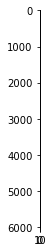

In [14]:
plt.imshow(results['agent'].FRs)
plt.show()

In [15]:
results['popdata']

,name,action,N,C,Taum,RestPot,ResetPot,Threshold,RestPot_ca,Alpha_ca,...,dpmn_APRE,dpmn_APOST,dpmn_XPRE,dpmn_XPOST,dpmn_type,dpmn_alphaw,dpmn_a,dpmn_b,dpmn_c,column
0,GPi`,left`,75`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,0
1,GPi`,right`,75`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,1
2,STNE`,left`,750`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,2
3,STNE`,right`,750`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,3
4,GPeP`,left`,750`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,4
5,GPeP`,right`,750`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,5
6,D1STR`,left`,75`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,0.0`,0.0`,0.0`,0.0`,1`,18.333333333333332`,1.0`,0.1`,0.05`,6
7,D1STR`,right`,75`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,0.0`,0.0`,0.0`,0.0`,1`,18.333333333333332`,1.0`,0.1`,0.05`,7
8,D2STR`,left`,75`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,0.0`,0.0`,0.0`,0.0`,2`,-15.0`,0.5`,0.005`,0.05`,8
9,D2STR`,right`,75`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,0.0`,0.0`,0.0`,0.0`,2`,-15.0`,0.5`,0.005`,0.05`,9


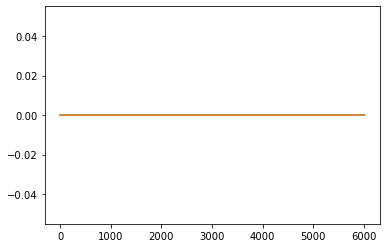

In [16]:
plt.plot(results['agent'].FRs[:,10])
plt.plot(results['agent'].FRs[:,11])
plt.show()

In [17]:
testb = np.concatenate(([results['agent'].FRs],[results['agent'].FRs]))
testb

array([[[500.        , 500.        ,  56.66666667, ...,   0.        ,
           0.        ,   0.        ],
        [500.        , 500.        ,  56.4       , ...,   0.        ,
           0.        ,   0.        ],
        [500.        , 500.        ,  57.33333333, ...,   0.        ,
           0.        ,   0.        ],
        ...,
        [500.        , 500.        ,  54.13333333, ...,   0.        ,
           0.        ,   0.        ],
        [500.        , 500.        ,  53.06666667, ...,   0.        ,
           0.        ,   0.        ],
        [500.        , 500.        ,  53.33333333, ...,   0.        ,
           0.        ,   0.        ]],

       [[500.        , 500.        ,  56.66666667, ...,   0.        ,
           0.        ,   0.        ],
        [500.        , 500.        ,  56.4       , ...,   0.        ,
           0.        ,   0.        ],
        [500.        , 500.        ,  57.33333333, ...,   0.        ,
           0.        ,   0.        ],
        ...,


In [18]:
np.concatenate((testb,[results['agent'].FRs]))

array([[[500.        , 500.        ,  56.66666667, ...,   0.        ,
           0.        ,   0.        ],
        [500.        , 500.        ,  56.4       , ...,   0.        ,
           0.        ,   0.        ],
        [500.        , 500.        ,  57.33333333, ...,   0.        ,
           0.        ,   0.        ],
        ...,
        [500.        , 500.        ,  54.13333333, ...,   0.        ,
           0.        ,   0.        ],
        [500.        , 500.        ,  53.06666667, ...,   0.        ,
           0.        ,   0.        ],
        [500.        , 500.        ,  53.33333333, ...,   0.        ,
           0.        ,   0.        ]],

       [[500.        , 500.        ,  56.66666667, ...,   0.        ,
           0.        ,   0.        ],
        [500.        , 500.        ,  56.4       , ...,   0.        ,
           0.        ,   0.        ],
        [500.        , 500.        ,  57.33333333, ...,   0.        ,
           0.        ,   0.        ],
        ...,


### 2. Modifying default values 

### 2.1 Modifying values 

In [ ]:
environment = {
    'params': pd.DataFrame([[8, 30]], columns=['N', 'C']),
    'pops' : {'FSI': {'Taum': [60]}}, 
    'receps' : pd.DataFrame([[100, 100]], columns=['Tau_AMPA', 'Tau_GABA']), 
    'base' : {'FSI': {'FreqExt_AMPA': [100]}}, 
    'dpmns' : pd.DataFrame([[400, 100]], columns=['dpmn_wmax', 'dpmn_tauDOP']),
    'd1' : pd.DataFrame([[3, 50]], columns=['dpmn_type', 'dpmn_c']),
    'd2' : pd.DataFrame([[3, 50]], columns=['dpmn_type', 'dpmn_c']),
    'channels' : pd.DataFrame([["left"],["right"]], columns=['action']), #action channels related parameters (init_params.py)
    #'actionchannels' : pd.DataFrame([[1],[2]], columns=['action']), 
    'newpathways' : pd.DataFrame([['LIP', 'D1STR', 'AMPA', 'syn', 700, 0.027]], columns=['src', 'dest', 'receptor', 'type', 'con', 'eff']), 
    'Q_support_params': None,
    'Q_df':None,
    'n_trials': 5,
    'volatility': 2,
    'conflict': 0.7,
    'reward_mu': 1,
    'reward_std': 0.1,
}
results = cbgt.ExecutionManager(cores=7).run(pl,environment) 

In [ ]:
results['popdata']

In [ ]:
results['Q_df']

### 2.2 Modifying a subset of values

In [ ]:
environment = {
    'params': pd.DataFrame([[4, 1]], columns=['N', 'C']), 
    'pops': None,
    'receps' : None, 
    'base' : None,
    'dpmns' : None,
    'd1' : None,
    'd2' : None,
    'channels' : pd.DataFrame([["left"],["right"]], columns=['action']), #action channels related parameters (init_params.py)
    #'actionchannels' : pd.DataFrame([[1],[2]], columns=['action']), 
    'newpathways' : None, 
    'Q_support_params': None,
    'Q_df':None,
    'n_trials': 5,
    'volatility': 2,
    'conflict': 0.7,
    'reward_mu': 1,
    'reward_std': 0.1,
}

results = cbgt.ExecutionManager(cores=7).run(pl,environment) 

In [ ]:
results['popdata']

In [ ]:
results['Q_df']

### 3. Back to default values 

In [ ]:
#See init_params.py / generateepochs.py / popconstruct.py / qvalues.py
#to know the parameters contained in each of the following variables 
environment = {
    'params': None, #neuron parameters (init_params.py)
    'pops': None,   #population parameters (init_params.py)
    'receps' : None, #receptor parameters (init_params.py)
    'base' : None, #baseline stimulation parameters (init_params.py)
    'dpmns' : None, #dopamine related parameters (init_params.py)
    'd1' : None, #D1-MSNs population related parameters (init_params.py)
    'd2' : None, #D2-MSNs population related parameters (init_params.py)
    'channels' : pd.DataFrame([["left"],["right"]], columns=['action']), #action channels related parameters (init_params.py)
    #'actionchannels' : pd.DataFrame([[1],[2]], columns=['action']), #labels for the actions (init_params.py)
    'newpathways' : None, #connectivity parameters (popconstruct.py)
    'Q_support_params': None, #initialization of Q-values update (qvalues.py) 
    'Q_df':None, #initialized Q-values df (qvalues.py)  
    'n_trials': 5, #number of trials (generateepochs.py)
    'volatility': 2, #frequency of changepoints (generateepochs.py)
    'conflict': 0.7, #probability of the preferred choice (generateepochs.py)
    'reward_mu': 1, #mean for the magnitude of the reward (generateepochs.py)
    'reward_std': 0.1, #std for the magnitude of the reward (generateepochs.py)
}
results = cbgt.ExecutionManager(cores=7).run(pl,environment) 

In [ ]:
results['popdata']

In [ ]:
results['Q_df']

In [ ]:
#?

In [ ]:
dev = cbgt.Pipeline()

In [ ]:
dev.add(codeblock_agent_phase0)

In [ ]:
output = cbgt.ExecutionManager(cores=7).run(dev,results) 